In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [12]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-17b

In [13]:
df = pd.read_csv("WASP_17_literature.csv")#, header=None)
df = df.set_index('Parameter')

In [14]:
df

,TICv8,Gaia DR2,Bonomo et al. 2017,Stassun et al. 2017,Sedaghati et al. 2016,Tsantaki et al. 2014,Knutson et al. 2014,Mortier et al. 2013,Southworth et al. 2012,Anderson et al. 2011,Triaud et al. 2010,Anderson et al. 2010,ExoFOP-TESS TOI
Parameter,,,,,,,,,,,,,
T_eff,6548.000+138.197-142.289,6218.000+317.667-138.020,6650+/-80,6550+/-100,---,6666+/-30,---,6794+/-83,---,6650+/-80,6650+/-80,6550+/-100,6650
systematic_radial_velocity,---,-47.977050594515134+/-1.270531493274848,---,---,---,---,---,---,---,-49.51367+/-0.00056,---,-49.5128+/-0.0016,---
vsini,---,---,10.05+0.88-0.79,---,---,9.93,---,---,---,10.05+0.88-0.79,9.920+0.400-0.450,9.0+/-1.5,---
stellar_mass,1.354000+0.269619-0.158546,---,1.306+/-0.026,2.28+/-0.99,1.306+/-0.026,---,1.286+/-0.079,1.20+/-0.08,1.286+/-0.079,1.306+/-0.026,1.20+/-0.12,1.20+/-0.12,---
stellar_radius,1.5732300+0.0842382-0.0924704,1.6021124+0.0735638-0.1519570,1.572+/-0.056,1.49+/-0.19,1.572+/-0.056,---,---,0.73+/-0.08,1.583+/-0.041,1.572+/-0.056,1.579+0.067-0.060,1.38+/-0.20,1.57+/-0.09
metallicity,---,---,-0.190+/-0.090,-0.25,---,-0.04+/-0.03,-0.020+/-0.090,-0.12+/-0.05,---,-0.19+/-0.09,-0.19+/-0.09,---,---
stellar_density,0.4902361+0.0978443-0.1589762,---,---,0.980+/-0.200,---,---,---,0.32+/-0.01,0.457+/-0.017,0.474+/-0.042,0.428+0.023-0.028,---,---
log_g,4.1761000+0.0689027-0.1220980,---,---,4.20+/-0.20,---,4.26+/-0.06,---,4.83+/-0.09,4.149+/-0.014,4.161+/-0.026,4.45+/-0.15,---,4.1639
spectral_type,---,---,---,---,---,---,---,---,---,---,F4,---,---


In [15]:
df_ref_list = df.columns

df_T_eff_list = df.loc['T_eff'] #Stellar effective temperature (K)
df_metallicity_list = df.loc['metallicity'] #Metallicity ([Fe/H])
df_log_g_list = df.loc['log_g'] #Stellar surface gravity (log10(cm/s^2)
df_rs_list = df.loc['stellar_radius']

T_eff_list, T_eff_ref_list = read_df_params(df_T_eff_list, df_ref_list)
metallicity_list, metallicity_ref_list = read_df_params(df_metallicity_list, df_ref_list)
log_g_list, log_g_ref_list = read_df_params(df_log_g_list, df_ref_list)
rs_list, rs_ref_list = read_df_params(df_rs_list, df_ref_list)

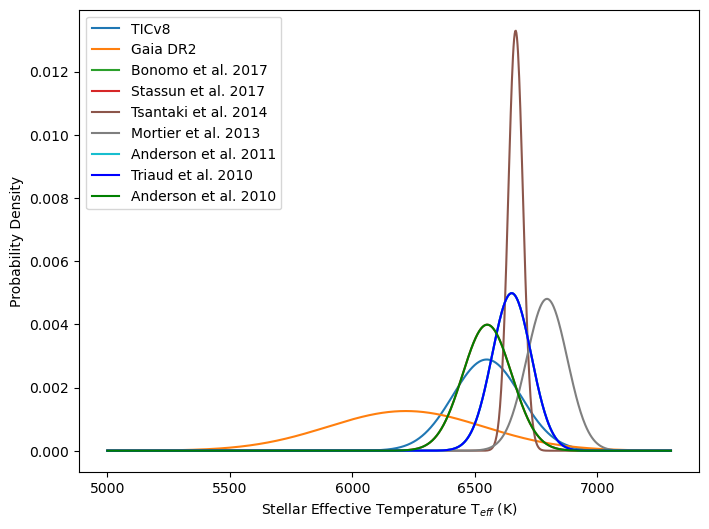

In [16]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(5000, 7300, 1000)
for obj, author in zip(T_eff_list, T_eff_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Effective Temperature T$_{eff}$ (K)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

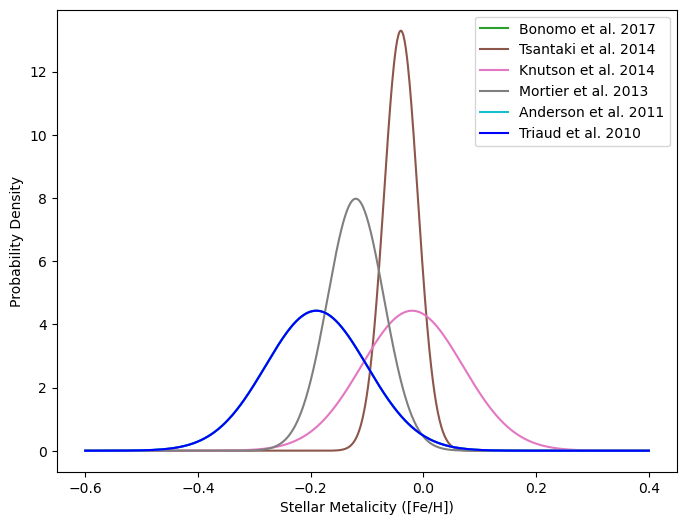

In [17]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(-0.6, 0.4, 1000)
for obj, author in zip(metallicity_list, metallicity_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Metalicity ([Fe/H])")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

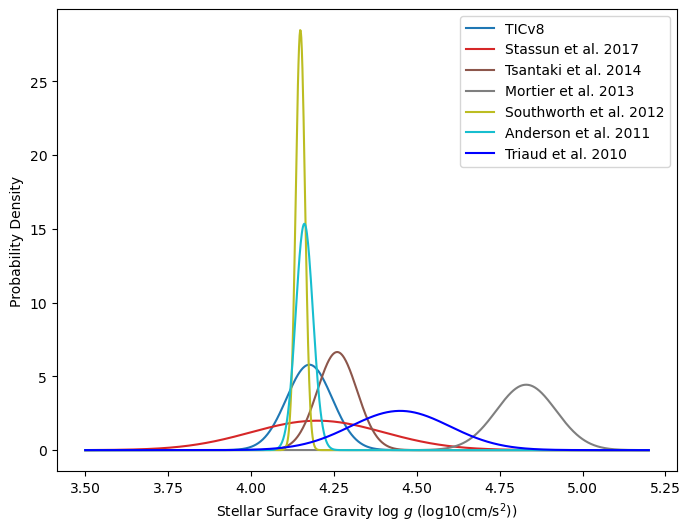

In [18]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.5, 5.2, 1000)
for obj, author in zip(log_g_list, log_g_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Surface Gravity log $g$ (log10(cm/s$^2$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

In [19]:
rs_list

array([[ 1.57323  ,  0.0842382, -0.0842382],
       [ 1.6021124,  0.0735638, -0.0735638],
       [ 1.572    ,  0.056    , -0.056    ],
       [ 1.49     ,  0.19     , -0.19     ],
       [ 1.572    ,  0.056    , -0.056    ],
       [ 0.73     ,  0.08     , -0.08     ],
       [ 1.583    ,  0.041    , -0.041    ],
       [ 1.572    ,  0.056    , -0.056    ],
       [ 1.579    ,  0.067    , -0.067    ],
       [ 1.38     ,  0.2      , -0.2      ],
       [ 1.57     ,  0.09     , -0.09     ]])

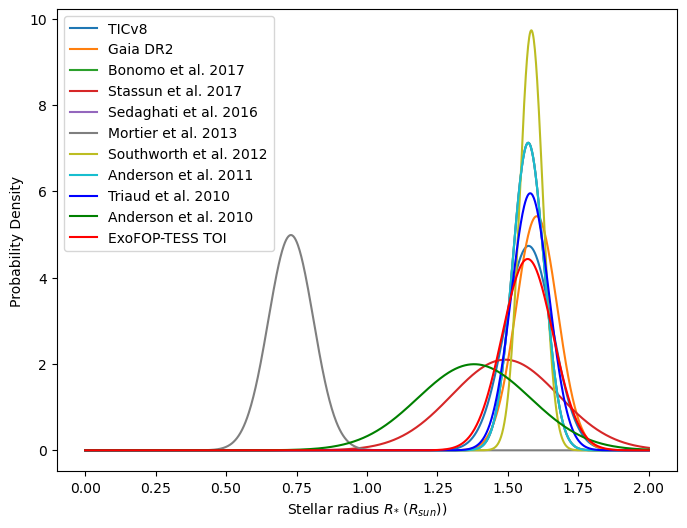

In [20]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0, 2, 1000)
for obj, author in zip(rs_list, rs_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar radius $R_{*}$ ($R_{sun}$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()